<h1>Thin Film Optics Virtual Laboratory</h1>

Before getting started, we need to load some packages for Python and make some definitions:

In [1]:
%matplotlib inline 
#the output of plotting commands is displayed  directly below the code cell that produced it
import matplotlib.pyplot as plt
import numpy as np
import math 
j = complex(0,1)
wl= np.arange(300.0, 2001.0, 1.0) #<---Wavelengths in interval
l= len(wl)

<h2>Introduction</h2>

Our objective is to study the transmittance $T$ and reflectance $R$ under normal incidence for a single thin film of complex refractive index $N_2$ and thickness $d$ which lies onto a semi-infinite substrate of refractive index $N_3$. Thin film and substrate are inmersed in a medium of refractive indes $N_1$: 
<br/>
<br/>
<img src="layers.png" alt="thin film stack" style="width:300px;"> 
 
As studied in class, under the conditions specified above, the amplitude reflectance $r$ and transmittance $t$ are given by:

\begin{equation}
r = \frac{r_1+r_2e^{-2i\delta}}{1+r_1r_2e^{-2i\delta}},
\end{equation}

being:

\begin{equation}
r _1= \frac{N_1-N_2}{N_1+N_2},
\end{equation}

and,

\begin{equation}
r _2= \frac{N_2-N_3}{N_2+N_3}.
\end{equation}

Analogously:

\begin{equation}
t = \frac{t_1t_2e^{-i\delta}}{1+r_1r_2e^{-2i\delta}},
\end{equation}

being

\begin{equation}
t_1=\frac{2N_1}{N_1+N_2},
\end{equation}

and

\begin{equation}
t_2=\frac{2N_2}{N_2+N_3}.
\end{equation}

Where $\delta$ is the phase shift:

\begin{equation}
\delta=-\frac{2\pi}{\lambda}N_2d.
\end{equation}

The terms $r_1$ and $t_1$ are the Fresnel coefficients for the boundary medium/film. Analogously, $r_2$ and $t_2$ are the Fresnel coefficients for the boundary film/substrate.  Note that considering $s-$ and $p-$ polarized light is not relevant for normal incidence. 

With the equations above, we get $R$ and $T$ as:

\begin{equation}
R = rr^\star
\end{equation}

and

\begin{equation}
T =\Re(\frac{N_3}{N_1})tt^\star.
\end{equation}


In Python we define the function T, which admits  $N_1$, $N_2$,$N_3$ and $d$ as inputs, and returns the transmittance $T$ of the layer stack:

In [2]:
def T(N1,N2,N3,d):
	delta= -(2.0*math.pi/wl)*N2*d
	r1= (N1-N2)/(N1+N2)
	r2= (N2-N3)/(N2+N3)
	t1 = 2*N1/(N1+N2)
	t2 = 2*N2/(N2+N3)
	t = (t1*t2*np.exp(-j*delta))/(np.array([1]*l)+r1*r2*np.exp(-2*j*delta))
	z = N3/N1
	return z.real*abs(t)*abs(t)*100	

Analogously, we define function R, which returns the reflectance $R$:

In [3]:
def R(N1,N2,N3,d):
	delta= -(2.0*math.pi/wl)*N2*d
	r1= (N1-N2)/(N1+N2)
	r2= (N2-N3)/(N2+N3)
	t1 = 2*N1/(N1+N2)
	t2 = 2*N2/(N2+N3)
	r =(r1+r2*np.exp(-2*j*delta))/(np.array([1]*l)+r1*r2*np.exp(-2*j*delta))
	return abs(r)*abs(r)*100	

<h2> Part 1: non-absorbing films and substrates</h2>

<h3> Exercise 1</h3>

In this exercise, all the refractive indexes are real (non-absorbing film and substrate).

We are going to calculate $R$ and $T$ for an Al$_2$O$_3$ film $N=1.77$ on a glass substrate $N=1.52$ and in air $N=1.00$.

Then we will repeat the calculations for a MgF$_2$ film $N=1.38$ and a diamond film $N=2.43$. 

We will plot all spectra in the same graph, assuming $d=500$ nm

<h4>Solution:</h4>

Defining the refractive indexes for the medium (air) and for the different materials involved:

In [4]:
AIR= np.array([complex(1.0 , 0.0)] * l)
AL2O3 = np.array([complex(1.77 , 0.0)] * l)
MGF2 = np.array([complex(1.38,0.0)] * l)
DIAMOND = np.array([complex(2.43,0.0)] * l)
GLASS = np.array([complex(1.52,0.0)] * l)

Using the functions T and R, we calculate $R$ and $T$ for each case:

In [5]:
T_AL2O3 = T(AIR,AL2O3,GLASS,500)
R_AL2O3 = R(AIR,AL2O3,GLASS,500)
T_MGF2 = T(AIR,MGF2,GLASS,500)
R_MGF2 = R(AIR,MGF2,GLASS,500)
T_DIAMOND = T(AIR,DIAMOND,GLASS,500)
R_DIAMOND = R(AIR,DIAMOND,GLASS,500)

Now, we just plot the curves:

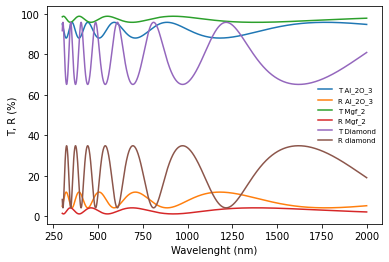

In [6]:
plt.plot(wl,T_AL2O3, label='T Al_2O_3')
plt.plot(wl,R_AL2O3, label='R Al_2O_3')
plt.plot(wl,T_MGF2, label='T Mgf_2')
plt.plot(wl,R_MGF2, label='R Mgf_2')
plt.plot(wl,T_DIAMOND, label='T Diamond')
plt.plot(wl,R_DIAMOND, label='R diamond')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("T, R (%)")
plt.legend(loc='center right', fontsize= 7,frameon=False)
plt.show()

<h3> Exercise 2</h3> 

Print $R$ for the previous case together with $R$ for the uncoated glass substtate. Use the results to formulate a general rule for $R$ of non-absorbing films on non-absorbing substrates according to:

n$_{film} >$ n$_{sub} \Longrightarrow$R$_{film}$___ R$_{sub}$


n$_{film} <$ n$_{sub} \Longrightarrow$R$_{film}$___ R$_{sub}$

<h4>Hint:</h4>

Lets calculate $R$ for the naked glass substrate:

In [7]:
R_GLASS = R(AIR,AIR,GLASS,500)

And now we plot the grap with all the reflectances:

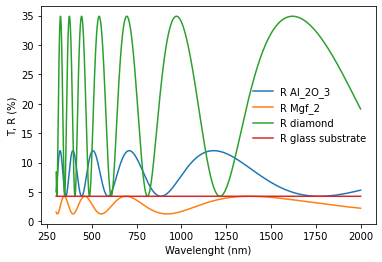

In [8]:
plt.plot(wl,R_AL2O3, label='R Al_2O_3')
plt.plot(wl,R_MGF2, label='R Mgf_2')
plt.plot(wl,R_DIAMOND, label='R diamond')
plt.plot(wl,R_GLASS, label='R glass substrate')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("T, R (%)")
plt.legend(loc='best', fontsize= 10,frameon=False)
plt.show()

<h2> Part 2: Weakly absorbing films onto non-absorbing/absorbing substrates.</h2>

<h3> Exercise 3</h3>


Now the refractive index of the film is complex, but the complex component is not too big.  

Calculate and plot  $R$ and $T$ spectra for a film with $N=2.0+k_2i$, where: $0.0\leq k_2\leq 0.2$. Assume a glass substrate and inlude the reflectance for the uncoated substrate in the plot.

1. Why the stronger reduction in $T$ takes place at shorter wavelengths?


2. How does $R$ change with increasing $k$? 


<h4>Hint:</h4>

We first define the complex refractive index for three materials: DUMMY1, DUMMY2 and DUMMY3 with refractive indexes $N=2.0+0.0𝑖$ , $N=2.0+0.1𝑖$ and $N=2.0+0.2𝑖$, respectively:

In [9]:
DUMMY1 = np.array([complex(2.0,0.0)] * l)
DUMMY2 = np.array([complex(2.0,0.1)] * l)
DUMMY3 = np.array([complex(2.0,0.2)] * l)

Thus, we can use the functions $T$ and $R$ to obtain the transmittance and reflectance for each case:

In [10]:
T_DUMMY1 = T(AIR,DUMMY1,GLASS,500)
R_DUMMY1 = R(AIR,DUMMY1,GLASS,500)
T_DUMMY2 = T(AIR,DUMMY2,GLASS,500)
R_DUMMY2 = R(AIR,DUMMY2,GLASS,500)
T_DUMMY3 = T(AIR,DUMMY3,GLASS,500)
R_DUMMY3 = R(AIR,DUMMY3,GLASS,500)
T_GLASS = T(AIR,AIR,GLASS,500)
R_GLASS = R(AIR,AIR,GLASS,500)

Then we plot each curve:

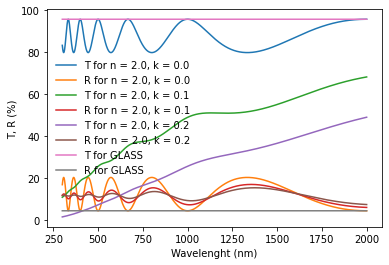

In [11]:
plt.plot(wl,T_DUMMY1, label='T for n = 2.0, k = 0.0')
plt.plot(wl,R_DUMMY1, label='R for n = 2.0, k = 0.0')
plt.plot(wl,T_DUMMY2, label='T for n = 2.0, k = 0.1')
plt.plot(wl,R_DUMMY2, label='R for n = 2.0, k = 0.1')
plt.plot(wl,T_DUMMY3, label='T for n = 2.0, k = 0.2')
plt.plot(wl,R_DUMMY3, label='R for n = 2.0, k = 0.2')
plt.plot(wl,T_GLASS, label='T for GLASS')
plt.plot(wl,R_GLASS, label='R for GLASS')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("T, R (%)")
plt.legend(loc='best', fontsize= 10,frameon=False)
plt.show()

<h3> Exercise 4</h3>

Do the same calculations as in Exercise 3 for the non-absorbing film ($k_2=0$), but now assume a substrate of refractie index $N=1.52+k_3i$, being $0.00\leq k_3\leq0.20$. Is it surprising that $T$ does not decrease with an increasing $k_3$?


<h4>Hint:</h4>

We can define two more types of glass, this time adding a complex component.

In [12]:
GLASSk01=np.array([complex(1.52,0.1)] * l)
GLASSk02 = np.array([complex(1.52,0.2)] * l)

As before, we use functions T and R to calculate transmittance and reflecctance for each case, and we plot the graphs:

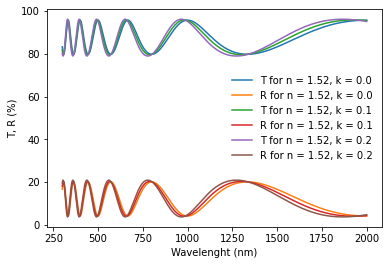

In [13]:
T_DUMMY1 = T(AIR,DUMMY1,GLASS,500)
R_DUMMY1 = R(AIR,DUMMY1,GLASS,500)
T_GLASSk01 = T(AIR,DUMMY1,GLASSk01,500)
R_GLASSk01 = R(AIR,DUMMY1,GLASSk01,500)
T_GLASSk02 = T(AIR,DUMMY1,GLASSk02,500)
R_GLASSk02 = R(AIR,DUMMY1,GLASSk02,500)	


plt.plot(wl,T_DUMMY1, label='T for n = 1.52, k = 0.0')
plt.plot(wl,R_DUMMY1, label='R for n = 1.52, k = 0.0')
plt.plot(wl,T_GLASSk01, label='T for n = 1.52, k = 0.1')
plt.plot(wl,R_GLASSk01, label='R for n = 1.52, k = 0.1')
plt.plot(wl,T_GLASSk02, label='T for n = 1.52, k = 0.2')
plt.plot(wl,R_GLASSk02, label='R for n = 1.52, k = 0.2')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("T, R (%)")
plt.legend(loc='best', fontsize= 10,frameon=False)
plt.show()

<h2> Part 3: Non-absorbing and absorbing dielectric films onto high and low reflective metallic substrates</h2>

We will now switch to metallic substrates, and look at the reflectance spectra only, since the transmittance (in the spectral region we are studying) is zero for metals. We also distinguish between high-reflective metals (e.g. Ag and Al where $n < 1$ and $k >> n$), and low-reflective metals (e.g. Fe and Ni where $n > 1$ and $k > n$).  

<h3> Exercise 5</h3>

Plot $R$ for two films of $d =$ 70 nm and 110 nm and $N=2.00+0.00i$ on a high-reflective metal substrate $N=0.15+3.50i$. Include $R$ for the uncoated substrate in the plot.

1. What is the largest change in $R$ obtained in the visible wavelength range? Will this be enough to give an appearance of a specific colour? In that case, which colour?


2. Will we obtain an efficient anti-reflecitve (AR) treatment of a highly reflective metal by coating it with a non-absorbing film?

<h4>Hint:</h4>

Defining the refractie index of the high-freflective metal:

In [14]:
HIREFMETAL= np.array([complex(0.15,3.50)] * l)

Calculating $R$ for each case and plotting:

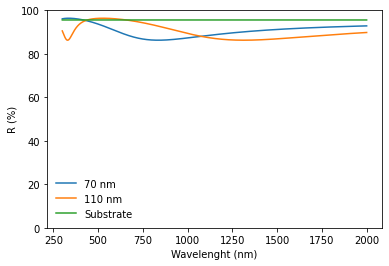

In [15]:
R_DUMMY1_70 = R(AIR,DUMMY1,HIREFMETAL,70)
R_DUMMY1_110 = R(AIR,DUMMY1,HIREFMETAL,110)
R_SUBS = R(AIR,AIR,HIREFMETAL,110)

plt.plot(wl,R_DUMMY1_70, label='70 nm')
plt.plot(wl,R_DUMMY1_110, label='110 nm')
plt.plot(wl,R_SUBS, label='Substrate')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("R (%)")
plt.legend(loc='best', fontsize= 10,frameon=False)
plt.ylim([0, 100])
plt.show()

<h3> Exercise 6</h3>


Same as in Exercise 5, but this time use a low-reflective metal ($N = 1.80 +3.50i$) as substrate. 

1. What is the largest change in $R$ in the visible wavelength range? Could this change give a colour appearance? If so, which colour? 


2. Do we obtain an efficient AR-treatment by putting a non-absorbing film on a low-reflective metal? 


<h4>Hint:</h4>

Defining the refractive index for the low-reflective metal: 

In [16]:
LOWREFMETAL= np.array([complex(1.8,3.50)] * l)

Calcultating $R$ and plotting:

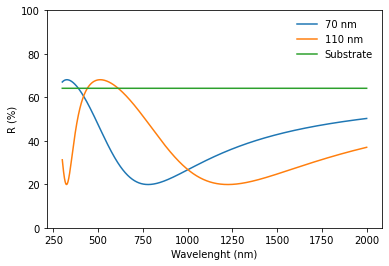

In [17]:
R_DUMMY1_70 = R(AIR,DUMMY1,LOWREFMETAL,70)
R_DUMMY1_110 = R(AIR,DUMMY1,LOWREFMETAL,110)
R_SUBS = R(AIR,AIR,LOWREFMETAL,110)

plt.plot(wl,R_DUMMY1_70, label='70 nm')
plt.plot(wl,R_DUMMY1_110, label='110 nm')
plt.plot(wl,R_SUBS, label='Substrate')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("R (%)")
plt.legend(loc='best', fontsize= 10,frameon=False)
plt.ylim([0, 100])
plt.show()

<h3> Exercise 7</h3> 


Now consider an absorbing thin film. Repeat Exercises 5 and 6 for three different thin films: $N= 2.00 + 0.00i$,  $N= 2.00 + 0.00i$ and  $N= 2.00 + 0.02i$. In all the cases $d=$ 110 nm.
	
1. What is the largest change in $R$ in the visible wavelength range?


2. Do we get an efficient AR-treatment by putting an absorbing film on a low- or high-reflective metal, respectively? 


3. How does $k$ influence the colour of the deposited film?


4. By examining the results from assignments 5, 6, and 7, can you tell if it is, to any significant extent, possible to increase the reflectance of a metal with a non-metallic coating?



<h4>Hint:</h4>

For the **high-reflective metal**:

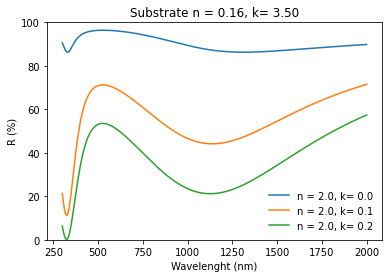

In [18]:
R_DUMMY1_110 = R(AIR,DUMMY1,HIREFMETAL,110)
R_DUMMY2_110 = R(AIR,DUMMY2,HIREFMETAL,110)
R_DUMMY3_110 = R(AIR,DUMMY3,HIREFMETAL,110)

plt.plot(wl,R_DUMMY1_110, label='n = 2.0, k= 0.0')
plt.plot(wl,R_DUMMY2_110, label='n = 2.0, k= 0.1')
plt.plot(wl,R_DUMMY3_110, label='n = 2.0, k= 0.2')
plt.title('Substrate n = 0.16, k= 3.50')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("R (%)")
plt.legend(loc='best', fontsize= 10,frameon=False)
plt.ylim([0, 100])
plt.show()

Analogously, for the **low-reflective metal**:

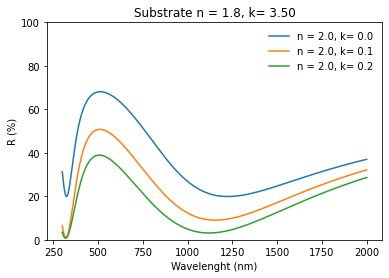

In [19]:
R_DUMMY1_110 = R(AIR,DUMMY1,LOWREFMETAL,110)
R_DUMMY2_110 = R(AIR,DUMMY2,LOWREFMETAL,110)
R_DUMMY3_110 = R(AIR,DUMMY3,LOWREFMETAL,110)

plt.plot(wl,R_DUMMY1_110, label='n = 2.0, k= 0.0')
plt.plot(wl,R_DUMMY2_110, label='n = 2.0, k= 0.1')
plt.plot(wl,R_DUMMY3_110, label='n = 2.0, k= 0.2')
plt.title('Substrate n = 1.8, k= 3.50')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("R (%)")
plt.legend(loc='best', fontsize= 10,frameon=False)
plt.ylim([0, 100])
plt.show()

<h2> Part 4: Dispersion</h2>

<h3> Exercise 8</h3> 

Remove absorption from the film and the substrate, but add dispersion in the film: make $N= n$ where $n$ is real but decreases linearly from 2.4 at 300 nm to 1.4 at 2000 nm. Use a constant, real, refractive index for the substrate, $N=1.50$. Plot $R$ and $T$ for various film thicknesses in the wavelength interval 300-1000 nm.

1. Looking at these results, suggest a qualitative method to obtain the dispersion for a film, using a reflectance spectrum containing interference effects.


2.  What do you think would be the effect of dispersion in the refractive index of the substrate? Try your theory by letting the refractive index of the substrate vary from 1.4 at 2000 nm to 1.8 at 300 nm. The dispersion of the film should be the same as in the previous point.




<h4>Hint:</h4>

We create a refractive index with the dispersion described in the text above:

In [20]:
i=0
DISPERSION= np.array([complex(0.0,0.0)] * l)
while (i <= l-1):
	n=2.576-(1./1700)*wl[i]
	DISPERSION[i] = complex(n,0.0)
	i=i+1

We calculate $T$ and $R$ for $d=$ 500, 300, 200, 100 and 50 nm and plot the results:

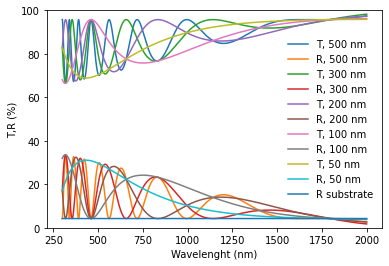

In [21]:
T_DISPERSION1 = T(AIR,DISPERSION,GLASS,500)
R_DISPERSION1 = R(AIR,DISPERSION,GLASS,500)
T_DISPERSION2 = T(AIR,DISPERSION,GLASS,300)
R_DISPERSION2 = R(AIR,DISPERSION,GLASS,300)
T_DISPERSION3 = T(AIR,DISPERSION,GLASS,200)
R_DISPERSION3 = R(AIR,DISPERSION,GLASS,200)	
T_DISPERSION4 = T(AIR,DISPERSION,GLASS,100)
R_DISPERSION4 = R(AIR,DISPERSION,GLASS,100)
T_DISPERSION5 = T(AIR,DISPERSION,GLASS,50)
R_DISPERSION5 = R(AIR,DISPERSION,GLASS,50)
R_SUBSTRATE = R(AIR,AIR,GLASS,50)

plt.plot(wl, T_DISPERSION1, label='T, 500 nm')
plt.plot(wl, R_DISPERSION1, label='R, 500 nm')
plt.plot(wl, T_DISPERSION2, label='T, 300 nm')
plt.plot(wl, R_DISPERSION2, label='R, 300 nm')
plt.plot(wl, T_DISPERSION3, label='T, 200 nm')
plt.plot(wl, R_DISPERSION3, label='R, 200 nm')
plt.plot(wl, T_DISPERSION4, label='T, 100 nm')
plt.plot(wl, R_DISPERSION4, label='R, 100 nm')
plt.plot(wl, T_DISPERSION5, label='T, 50 nm')
plt.plot(wl, R_DISPERSION5, label='R, 50 nm')
plt.plot(wl, R_SUBSTRATE, label='R substrate')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("T,R (%)")
plt.legend(loc='right', fontsize= 10,frameon=False)
plt.ylim([0, 100])
plt.show()

For the second part of the exercise, we add dispersion in the substrate:

In [22]:
i=0
#-linear refractive index-decreasing. 
# from n = 1.8 at 300 nm to n = 1.4 at 2000 nm
DISPERSIONGLASS= np.array([complex(0.0,0.0)] * l)
while (i <= l-1):
	n=-0.4/1700*wl[i]+1.87
	DISPERSIONGLASS[i] = complex(n,0.0)
	i=i+1


We calculate $T$ and $R$ for $d=$ 500, 300, 200, 100 and 50 nm and plot the results:

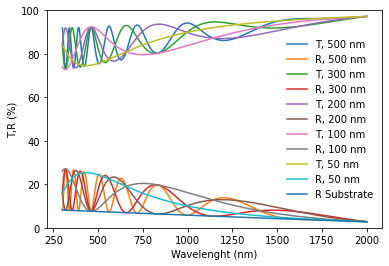

In [23]:
T_DISPERSION1 = T(AIR,DISPERSION,DISPERSIONGLASS,500)
R_DISPERSION1 = R(AIR,DISPERSION,DISPERSIONGLASS,500)
T_DISPERSION2 = T(AIR,DISPERSION,DISPERSIONGLASS,300)
R_DISPERSION2 = R(AIR,DISPERSION,DISPERSIONGLASS,300)
T_DISPERSION3 = T(AIR,DISPERSION,DISPERSIONGLASS,200)
R_DISPERSION3 = R(AIR,DISPERSION,DISPERSIONGLASS,200)	
T_DISPERSION4 = T(AIR,DISPERSION,DISPERSIONGLASS,100)
R_DISPERSION4 = R(AIR,DISPERSION,DISPERSIONGLASS,100)
T_DISPERSION5 = T(AIR,DISPERSION,DISPERSIONGLASS,50)
R_DISPERSION5 = R(AIR,DISPERSION,DISPERSIONGLASS,50)
R_SUBSTRATE = R(AIR,AIR,DISPERSIONGLASS,50)

plt.plot(wl, T_DISPERSION1, label='T, 500 nm')
plt.plot(wl, R_DISPERSION1, label='R, 500 nm')
plt.plot(wl, T_DISPERSION2, label='T, 300 nm')
plt.plot(wl, R_DISPERSION2, label='R, 300 nm')
plt.plot(wl, T_DISPERSION3, label='T, 200 nm')
plt.plot(wl, R_DISPERSION3, label='R, 200 nm')
plt.plot(wl, T_DISPERSION4, label='T, 100 nm')
plt.plot(wl, R_DISPERSION4, label='R, 100 nm')
plt.plot(wl, T_DISPERSION5, label='T, 50 nm')
plt.plot(wl, R_DISPERSION5, label='R, 50 nm')
plt.plot(wl, R_SUBSTRATE, label='R Substrate')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("T,R (%)")
plt.legend(loc='center right', fontsize= 10,frameon=False)
plt.ylim([0, 100])
plt.show()